# **Bayesian Analysis of Regression Models**
    
### **Introduction**

* Many studies concern the relationship between two or more observable quantities.

* How do changes in quantity y (the dependent variable) vary as a function of another quantity x (the independent variable)?

* Regression models allow us to examine the conditional distribution of $y$ given $x$, parameterized as $p(y|\beta,x)$ when the $n$ observations $(y_i, x_i)$ are exchangeable.

### **Multiple Linear Regression**

* The normal linear model occurs when a distribution of $y$ given $x$ is normal with a mean equal to a linear function of $X$:
$$
\mathbb{E}(y_i|\beta,X)=\beta_1 X_{1i}+\beta_2 X_{2i}+...+\beta_k X_{ki}
$$
for $i = 1,2,...,n$ and $X_1$ is a vector of one's.

* The ordinary linear regression model occurs when the variance of $y$ given $X$, $\beta$ is assumed to be constant over all observations.

* In other words, we have an ordinary linear regression model when:
$$
y_i\sim N(\beta_1+\beta_{2i} X_{2i}+\cdots+\beta_{ki} X_{ki}, \sigma^2)
$$
for $i = 1,2,\cdots,n$.

* If $$y_i\sim N(X_i^T\beta, \sigma^2)$$ 
$$
y\sim N_n(X^T\beta,\sigma^2I)
$$
then it is well known that the ordinary least squares estimates and the maximum likelihood estimates of the parameters $\beta=(\beta_1,...,\beta_k)$ are equivalent.

* If $\beta=[\beta_1,...,\beta_k]^T$  then the frequentist estimate of $\beta$ is
$$
\hat{\beta}=(X^TX)^{-1}X^Ty
$$

* The frequentist estimate of $\sigma^2$ is 
$$s^2=\frac{(y-X\beta)^T(y-X\beta)}{(n-k)}$$

* The sampling distribution of $\hat{\beta}$ is
$$
\hat{\beta}\sim N_k(\beta,\sigma^2(X^TX)^{-1})
$$

$$
\hat{\beta}\sim t_{n-k}(\beta,s^2(X^TX)^{-1})
$$

Ref: Multivariate Statistics, by T. W. Anderson (1984) Wiley Second Ed 

### **Bayesian Regression with Noninformative Flat Prior**

* By Bayes Rule, the posterior distribution is:
$$
p(\beta_1,...,\beta_k,\sigma^2|y,X)\propto \prod_{i=1}^n p(y_i|\mu_i,\sigma^2)p(\beta_1,...,\beta_k,\sigma^2)
$$

* The standard non-informative prior distribution is uniform on $(\beta,\log \sigma^2)$ which is equivalent to :
$$
p(\beta,\log(\sigma^2))\propto p(\beta) p(\log(\sigma^2)) = \sigma^{-2}
$$

* This prior is a good choice for statistical models when you have a lot of data points and only a few parameters.

* The Bayesian solution is equivalent to OLS or MLE and you enjoy the advantage of direct Bayesian probabilistic statement.

* The posterior distribution of $\sigma^2$ can be written as:
$$
p(\sigma^2|y,X)\sim Scaled-Inv \chi^2(n-k,s^2)
$$
where $s^2=(y-X\hat{\beta})^T(y-X\hat{\beta})/(n-k)$

* The marginal posteror distribution of $\beta$ follow Multivariate t-distribution, i.e.,
$$
p(\beta|y,X)\sim t_{n-k}(\hat{\beta},s^2(X^TX)^{-1})
$$

* Notice the close comparison with the classical results. The key difference would be interpretation of the standard errors.

### **Conjugate priors and the Gaussian linear model**

* Suppose that instead of an improper prior, we decide to use the conjugate prior.

* For the normal regression model, the conjugate prior distribution for $p(\beta_0,...,\beta_k,\sigma^2)$ is the normal-inverse-gamma distribution,
$$
p(\beta_0,...,\beta_k,\sigma^2)=p(\beta_0,...,\beta_k|\sigma^2)p(\sigma^2)
$$
where $$p(\beta_0,...,\beta_k|\sigma^2)\sim N_k(\beta_0,\Lambda_0)$$
and $$p(\sigma^2)\sim \text{Inv-Gamma}(a_0,b_0)$$

* **Posterior Distribution**
$$
p(\beta_0,...,\beta_k,\sigma^2|y,X)=p(\beta_0,...,\beta_k|\sigma^2,y,X)p(\sigma^2|y,X)
$$
where $$p(\beta_0,...,\beta_k|\sigma^2,y,X)\sim N_k(\beta_n,\Lambda_n)$$
and $$p(\sigma^2|y,X)\sim \text{Inv-Gamma}(a_n,b_n)$$

* **Posterior mean**:
$$
\mathbb{E}(\beta|y,X)=(X^TX+\Lambda_0^{-1})^{-1}(X^TX\hat{\beta}+\Lambda_0^{-1}\beta_0)
$$

* Notice that the coefficients are essentially a weighted average of the prior coefficients described by $\beta_0$ and standard OLS estimate $\hat{\beta}$.

* The weights are provided by the conditional prior precision $\Lambda_0^{-1}$ and the data $X^TX$. 

* This should make clear that as we increase our prior precision (decrease our prior variance) for $\beta$ we place greater posterior weight on our prior beliefs relative to the data.

* **Posterior mean**:
$$
\mathbb{E}(\beta|y,X)=(X^TX+\Lambda_0^{-1})^{-1}(X^TX\hat{\beta}+\Lambda_0^{-1}\beta_0)
$$

* If you choose $\beta_0 = 0$ and $\Lambda_0^{-1}=\lambda I$, then
$$
\mathbb{E}(\beta|y,X)=(X^TX+\lambda I)^{-1} X^Ty
$$
this is "**Ridge Solution**" of the Ridge Regression.

* Ridge Regression is a special case of Bayesian Regression with Conjugate prior

* Bayesian Regression with Conjugate prior automatically takes care of multicollinearity issue of the data.



# **Application : Capital Asset Pricing Model**



In [ ]:
data = read.csv(file='https://www.cmi.ac.in/~sourish/StatFin2016/Program/R_Workshop/stock_treasury.csv')
head(data)

,Date,IBM_Volume,IBM_AdjClose,Apple_Volume,Apple_AdjClose,MSFT_Volume,MSFT_AdjClose,Intel_Volume,Intel_AdjClose,SnP500,⋯,UST_Mo_3,UST_Mo_6,UST_Yr_1,UST_Yr_2,UST_Yr_3,UST_Yr_5,UST_Yr_7,UST_Yr_10,UST_Yr_20,UST_Yr_30
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-01-02,5525500,156.9353,53204600,106.9182,27913900,45.52076,23605600,34.98996,2058.20,⋯,0.02,0.11,0.25,0.66,1.07,1.61,1.92,2.12,2.41,2.69
2,2015-01-05,4880400,154.4659,64285500,103.9062,39673900,45.10216,32785000,34.59541,2020.58,⋯,0.03,0.10,0.26,0.68,1.06,1.57,1.85,2.04,2.32,2.60
3,2015-01-06,6146700,151.1347,65797100,103.9160,36447900,44.44018,30847600,33.95066,2002.61,⋯,0.03,0.10,0.25,0.65,1.02,1.50,1.78,1.97,2.25,2.52
4,2015-01-07,4701800,150.1469,40105900,105.3731,29114100,45.00480,27725200,34.66277,2025.90,⋯,0.03,0.09,0.25,0.62,1.00,1.47,1.76,1.96,2.25,2.52
5,2015-01-08,4236800,153.4104,59364500,109.4218,29645200,46.32876,31765400,35.30753,2062.14,⋯,0.03,0.08,0.23,0.62,1.00,1.50,1.81,2.03,2.33,2.59
6,2015-01-09,4484800,154.0785,53699500,109.5391,23942800,45.93936,22846000,35.37489,2044.81,⋯,0.02,0.08,0.22,0.59,0.96,1.45,1.75,1.98,2.29,2.55


Sample size =  250 


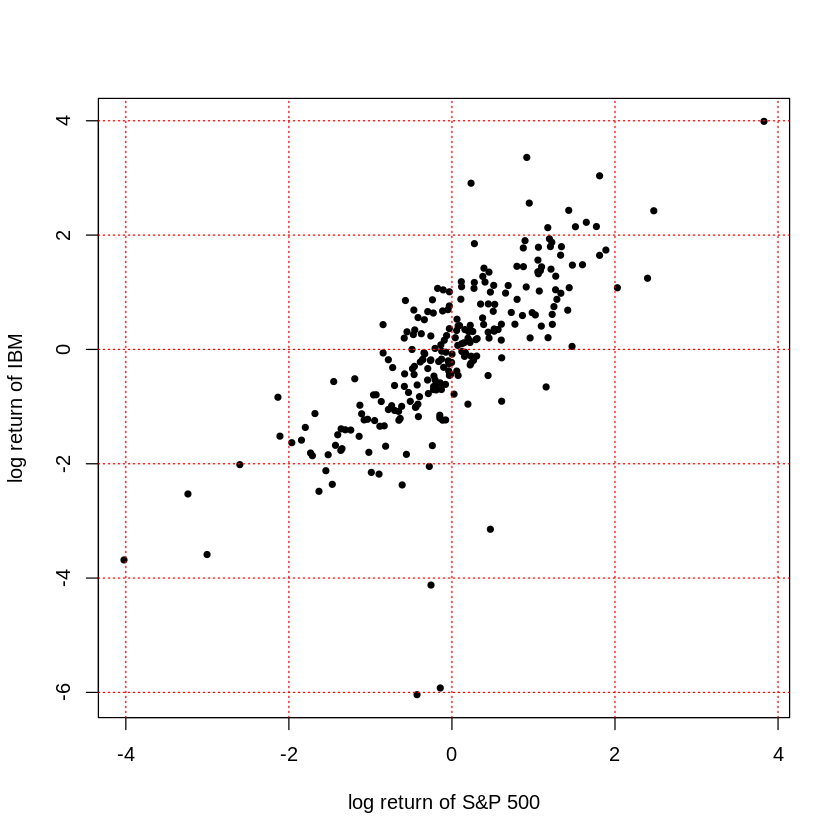

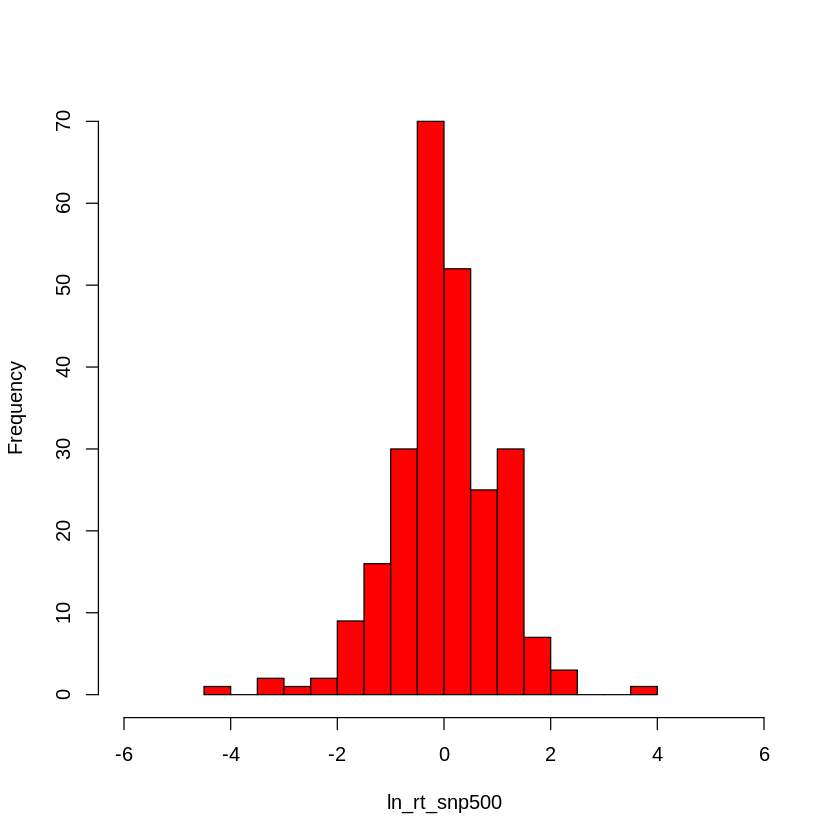

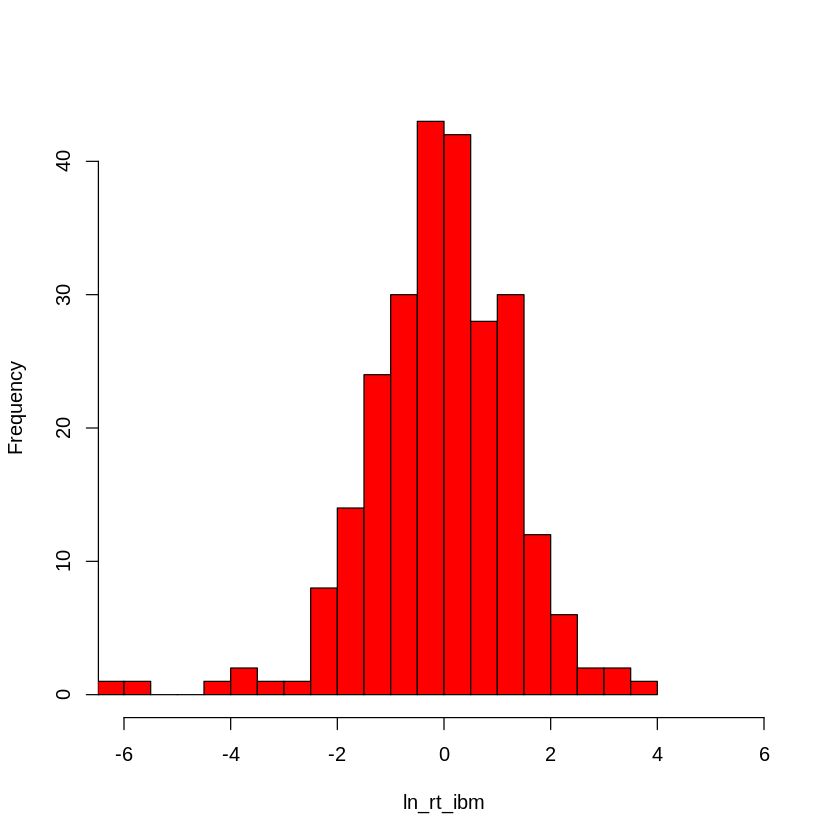

In [ ]:
n = nrow(data)
cat('Sample size = ',n,'\n')

# Risk Free Rate is in percentage and annualised. 
# So the following conversion is required.
Rf = data$UST_Yr_1/(250)

## Compute log-return in percentage
ln_rt_snp500 = diff(log(data$SnP500))*100-Rf[2:n]
ln_rt_ibm = diff(log(data$IBM_AdjClose))*100-Rf[2:n]
ln_rt_apple = diff(log(data$Apple_AdjClose))*100-Rf[2:n]
ln_rt_msft = diff(log(data$MSFT_AdjClose))*100-Rf[2:n]
ln_rt_intel = diff(log(data$Intel_AdjClose))*100-Rf[2:n]

## log-return of the portfolio
ln_r = cbind(ln_rt_ibm,ln_rt_apple,ln_rt_msft,ln_rt_intel)

plot(ln_rt_snp500,ln_rt_ibm,pch=20,xlab = 'log return of S&P 500',ylab='log return of IBM')
grid(col="red")
hist(ln_rt_snp500,main='',nclass=15,col='red',xlim = c(-6,6))
hist(ln_rt_ibm,main='',nclass=15,col='red',xlim = c(-6,6))



* **Portfolio Allocation**:

Company | IBM  | Apple | Microsoft | Intel 
--------|------|-------|-----------|-------
Weights | 20%  | 30%   |  25%      | 25%  
--------|------|-------|-----------|-------



In [ ]:
w = c(0.2,0.3,0.25,0.25)
ln_rt_portf = ln_r%*%w

$$
r_t^{\text{IBM}}=\alpha + \beta r_t^{\text{S&P 500}}+\epsilon_t
$$
$\epsilon_t \sim N(0,\sigma^2)$

$$
r_t^{\text{IBM}}\sim N(\alpha + \beta r_t^{\text{S&P 500}},\sigma^2)
$$

In [ ]:
capm_ibm = lm(ln_rt_ibm~ln_rt_snp500)
capm_ibm_analysis = coefficients(summary(capm_ibm))
capm_ibm_analysis = round(capm_ibm_analysis,digits = 5)
rownames(capm_ibm_analysis) = c("alpha","beta")
## Result of capm using lm() for IBM
capm_ibm_analysis


,Estimate,Std. Error,t value,Pr(>|t|)
alpha,-0.04989,0.05760,-0.86605,0.3873
beta,1.01601,0.05863,17.32801,0.0000


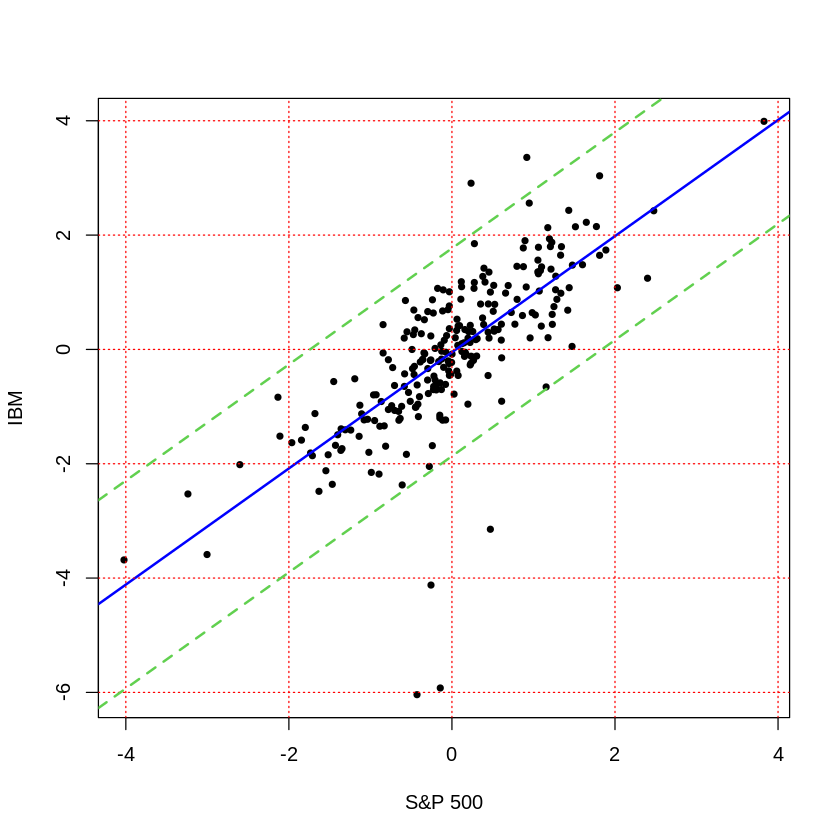

In [ ]:
plot(ln_rt_snp500
     ,ln_rt_ibm
     ,xlab="S&P 500"
     ,ylab="IBM"
     ,pch=20)
abline(capm_ibm
       ,col="blue"
       ,lwd=2)
grid(col="red")
## lower bound and upper bound
rse = summary(capm_ibm)$sigma
al = capm_ibm$coefficients[1]-2*rse
b = capm_ibm$coefficients[2]
abline(a= al,b= b,col=3,lty=2,lwd=2)
au = capm_ibm$coefficients[1]+2*rse
abline(a=au,b=b,col=3,lty=2,lwd=2)



### Bayesian CAPM

In [ ]:
rP = ln_rt_ibm
n = length(ln_rt_snp500)
Intercept = rep(1,n)
X = cbind(Intercept,ln_rt_snp500)
head(X)

Intercept,ln_rt_snp500
1,-1.8457613
1,-0.8943255
1,1.1552736
1,1.7720969
1,-0.8448122
1,-0.8134217


**parameters of prior distribution**

In [ ]:
nms = c("alpha","beta")
k = length(nms)
beta_0 = rep(0,k)
cat('prior mean of beta_0 = ',beta_0,'\n')

Lambda_0 = diag(1,nrow=length(beta_0))

a_0 = 0.1
b_0 = 0.01

prior mean of beta_0 =  0 0 


**parameters of posterior distribution**

In [ ]:
## parameters of posterior distribution
Lambda_pi = t(X)%*%X+Lambda_0
Lambda_pi_inv = solve(Lambda_pi)
beta_pi = Lambda_pi_inv%*%(t(X)%*%rP
                          +Lambda_0%*%beta_0)
rownames(beta_pi) = nms

cat('posterior mean of beta_pi = ',beta_pi,'\n')


a_pi = a_0+n/2
err = (rP-f%*%beta_pi)
b_pi = b_0+0.5*t(err)%*%(err)



posterior mean of beta_pi =  -0.04970582 1.011796 


* Compare posterior mean and MLE of $\beta$

In [ ]:
beta_estimates = cbind(beta_pi,capm_ibm_analysis[,'Estimate'])
colnames(beta_estimates) = c('Posterior mean','MLE')
round(beta_estimates,5)

,Posterior mean,MLE
alpha,-0.04971,-0.04989
beta,1.01180,1.01601


**Simulate from Posterior distribution**

$$p(\beta_0,...,\beta_k|\sigma^2,y,x)\sim N_k(\beta_n,\Lambda_n |\sigma^2,y,x)$$
and $$p(\sigma^2|y,x)\sim \text{Inv-Gamma}(a_n,b_n|y,x)$$


* We simulate in the following way:
  - Simulate $\sigma_i^{2}$ from $\text{Inv-Gamma}(a_n,b_n)$
  - Simulate $\beta_{0i},\cdots,\beta_{ki}$ from $N(\beta_n,\Lambda_n|\sigma_i^{2},y,x)$

In [ ]:
install.packages('mvtnorm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
## Simulate from Posterior distribution
set.seed(1)
library(mvtnorm)
N.sim = 30000
burnin = 0
sigma = rep(NA,N.sim)
beta.draws = matrix(NA
                     , nrow=N.sim
                     , ncol=k)
colnames(beta.draws) = nms

for(i in 1:(N.sim+burnin)){
  if(i %% 5000 ==0) cat('i=',i,'\n')
  sigma_2_star = 1/rgamma(1,a_pi,b_pi)
  S = sigma_2_star*Lambda_pi_inv
  beta_star = rmvnorm(1,mean = beta_pi
                     ,sigma = S)
  if(i >burnin){
    sigma[i-burnin] = sqrt(sigma_2_star)
    beta.draws[i-burnin,] = beta_star
  }
}
theta = cbind(beta.draws,sigma)
head(theta)


i= 5000 
i= 10000 
i= 15000 
i= 20000 
i= 25000 
i= 30000 


alpha,beta,sigma
0.0289259397,1.0883857,0.9330648
-0.1365226150,0.9584015,0.8902614
-0.0162772626,0.9938006,0.9189859
-0.0288374629,0.9778802,0.8492077
-0.0758787729,1.0280899,1.0069203
-0.0005678017,1.0480128,0.9446459


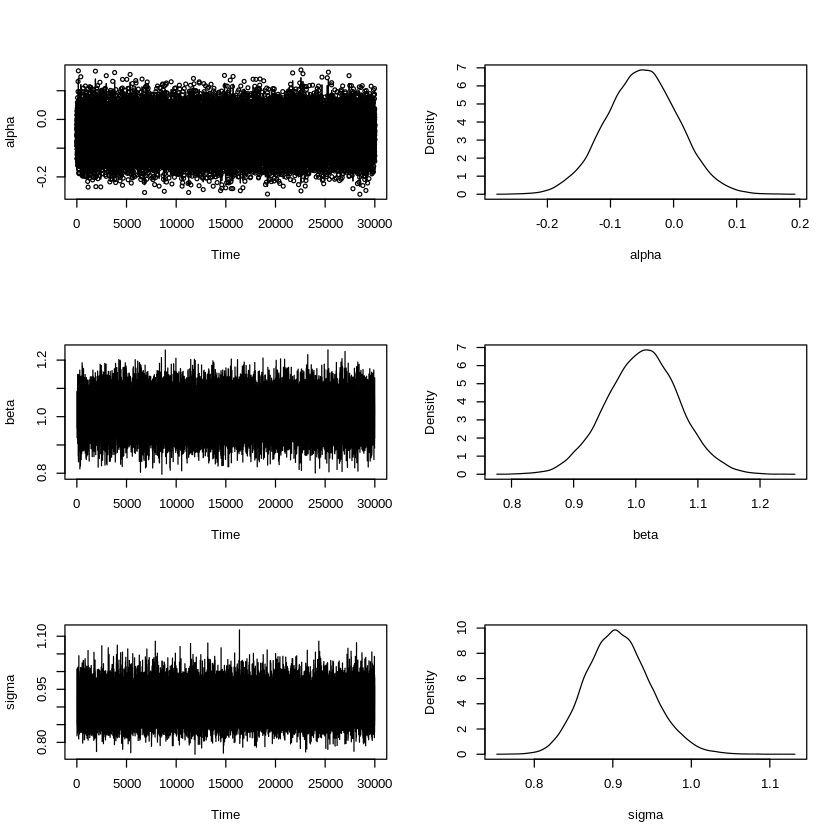

In [ ]:
par(mfrow=c(3,2))
plot(ts(theta[,"alpha"])
     ,ylab = "alpha",type='b')
plot(density(theta[,"alpha"])
     ,main = ""
     ,xlab = "alpha")
plot(ts(theta[,"beta"])
     ,ylab = "beta")
plot(density(theta[,"beta"])
     ,main = ""
     ,xlab = "beta")
plot(ts(theta[,"sigma"])
     ,ylab = "sigma")
plot(density(theta[,"sigma"])
     ,main = ""
     ,xlab = "sigma")


In [ ]:
post_median = apply(theta,2,median)
post_mean = apply(theta,2,mean)
post_sd   = apply(theta,2,sd)
post_band = apply(theta,2,quantile
                   ,prob=c(0.025,0.975))
post_sumry = rbind( post_median     
                   ,post_mean
                   ,post_sd
                   ,post_band)
rownames(post_sumry) = c("median"
                        ,"mean"
                        ,"sd"
                        ,"2.5%"
                        ,"97.5%")
round(post_sumry,digits = 4)


,alpha,beta,sigma
median,-0.0497,1.0122,0.9062
mean,-0.0499,1.0115,0.9079
sd,0.0573,0.0583,0.0409
2.5%,-0.1631,0.8966,0.8331
97.5%,0.0625,1.1266,0.9927


In [ ]:
beta_estimates = cbind(beta_pi,post_mean[1:2],capm_ibm_analysis[,'Estimate'])
colnames(beta_estimates) = c('Posterior mean (Analytical)','Posterior Mean (Numerical)','MLE')
round(beta_estimates,5)

,Posterior mean (Analytical),Posterior Mean (Numerical),MLE
alpha,-0.04971,-0.04988,-0.04989
beta,1.01180,1.01148,1.01601


We simulate
$$
\{\beta_1^*,\beta_2^*,\cdots,\beta_{N_s}^*\} \leftarrow N\Big(\mathbb{E}(\beta|y,X),\mathbb{V}ar(\beta|y,X)\Big)
$$
as simulation size $N_s$ increases, i.e.,
$$
N_s \rightarrow \infty
$$
$$
\hat{\beta}^*\longrightarrow \mathbb{E}(\beta|y,X),
$$
where $=\frac{1}{N_{s}}\sum_{i=1}^{N_{s}}\beta_i^*$.

**What about portfolio $\alpha$ and $\beta$**?

In [ ]:
rP = ln_rt_portf
## parameters of posterior distribution
Lambda_pi = t(X)%*%X+Lambda_0
Lambda_pi_inv = solve(Lambda_pi)
beta_pi = Lambda_pi_inv%*%(t(X)%*%rP
                          +Lambda_0%*%beta_0)
rownames(beta_pi) = nms

cat('posterior mean of beta_pi = ',beta_pi,'\n')


a_pi = a_0+n/2
err = (rP-f%*%beta_pi)
b_pi = b_0+0.5*t(err)%*%(err)

capm_portf = lm(rP~ln_rt_snp500)
capm_portf_coef = coefficients(summary(capm_portf))
capm_portf_coef = round(capm_portf_coef,digits = 5)
rownames(capm_portf_coef)=c("alpha","beta")
## Result of capm using lm() for IBM
capm_portf_coef


posterior mean of beta_pi =  0.007532961 1.105694 


,Estimate,Std. Error,t value,Pr(>|t|)
alpha,0.00758,0.04356,0.17406,0.86196
beta,1.11029,0.04434,25.04207,0.00000


In [ ]:
## parameters of posterior distribution
Lambda_pi = t(X)%*%X+Lambda_0
Lambda_pi_inv = solve(Lambda_pi)
beta_pi = Lambda_pi_inv%*%(t(X)%*%rP
                          +Lambda_0%*%beta_0)
rownames(beta_pi) = nms

cat('posterior mean of beta_pi = ',beta_pi,'\n')


a_pi = a_0+n/2
err = (rP-f%*%beta_pi)
b_pi = b_0+0.5*t(err)%*%(err)



posterior mean of beta_pi =  0.007532961 1.105694 


In [ ]:
## Simulate from Posterior distribution
set.seed(1)
library(mvtnorm)
N.sim = 3000
burnin = 0
sigma = rep(NA,N.sim)
beta.draws = matrix(NA
                     , nrow=N.sim
                     , ncol=k)
colnames(beta.draws) = nms

for(i in 1:(N.sim+burnin)){
  if(i %% 5000 ==0) cat('i=',i,'\n')
  sigma_2_star = 1/rgamma(1,a_pi,b_pi)
  S = sigma_2_star*Lambda_pi_inv
  beta_star = rmvnorm(1,mean = beta_pi
                     ,sigma = S)
  if(i >burnin){
    sigma[i-burnin] = sqrt(sigma_2_star)
    beta.draws[i-burnin,] = beta_star
  }
}
theta = cbind(beta.draws,sigma)
#head(theta)
post_mean = apply(theta,2,mean)

beta_estimates = cbind(beta_pi,post_mean[1:2],capm_portf_coef[,'Estimate'])
colnames(beta_estimates) = c('Posterior mean (Analytical)','Posterior Mean (Numerical)','MLE')
beta_estimates

,Posterior mean (Analytical),Posterior Mean (Numerical),MLE
alpha,0.007532961,0.007698012,0.00758
beta,1.105694103,1.104816021,1.11029


In [ ]:
apply(theta,2,quantile,prob=c(0.025,0.975))

,alpha,beta,sigma
2.5%,-0.07788178,1.018352,0.6301433
97.5%,0.09636173,1.190734,0.7499379


**What is the $\mathbb{P}(\alpha >0|y,x)$?**

In [ ]:
alpha_star = theta[,'alpha']
no.of.alpha.gt.zero = length(alpha_star[alpha_star>0])
total.no.of.alpha = length(alpha_star)

prob_a_gt_zero = (no.of.alpha.gt.zero/total.no.of.alpha)*100

round(prob_a_gt_zero,4)

[1] 56.7333

## **Stress Testing: If S&P 500 drops by 3%, the portfolio return vary**

*  What happens to the portfolio if S&P 500 drops by 3% in a day?

* We can simulate from posterior predictive distribution 
$$
  p(\tilde{y}|y,x)=\int_{\beta,\sigma}p(\tilde{y}|\beta,\sigma,x)p(\beta, \sigma|y,x)d\beta d\sigma
$$

* We simulate in the following way:

  - Simulate $\beta_i^*$ and $\sigma_i^*$ from $p(\beta,\sigma|y,x)$
  - Simulate $\tilde{y}_i^*$ from $N(x^T\beta_i^*,\sigma_i^*)$

2.5%  97.5% 
-4.701 -1.881

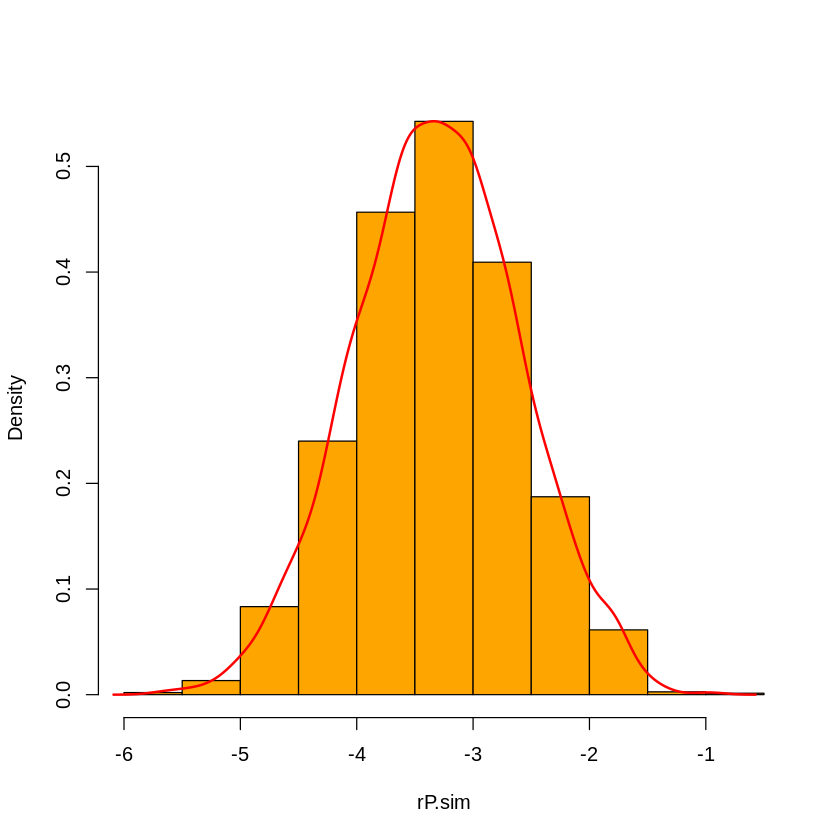

In [ ]:
market_drop=-3
rP.sim = rep(NA,N.sim)
x0 = matrix(c(1,market_drop),nrow=1,ncol = k)
for(i in 1:N.sim){
  ErP = x0%*%theta[i,1:k]
  rP.sim[i] = rnorm(1,mean = ErP, sd= theta[i,(k+1)])
}

round(quantile(rP.sim,prob = c(0.025,0.975)),3)
hist(rP.sim,probability = TRUE,col="orange",main="")
lines(density(rP.sim),lwd=2,col="red")

**Test the Assumpution**

In [ ]:
### Test the assumption
shapiro.test(capm_portf$residuals)


	Shapiro-Wilk normality test

data:  capm_portf$residuals
W = 0.94758, p-value = 8.468e-08


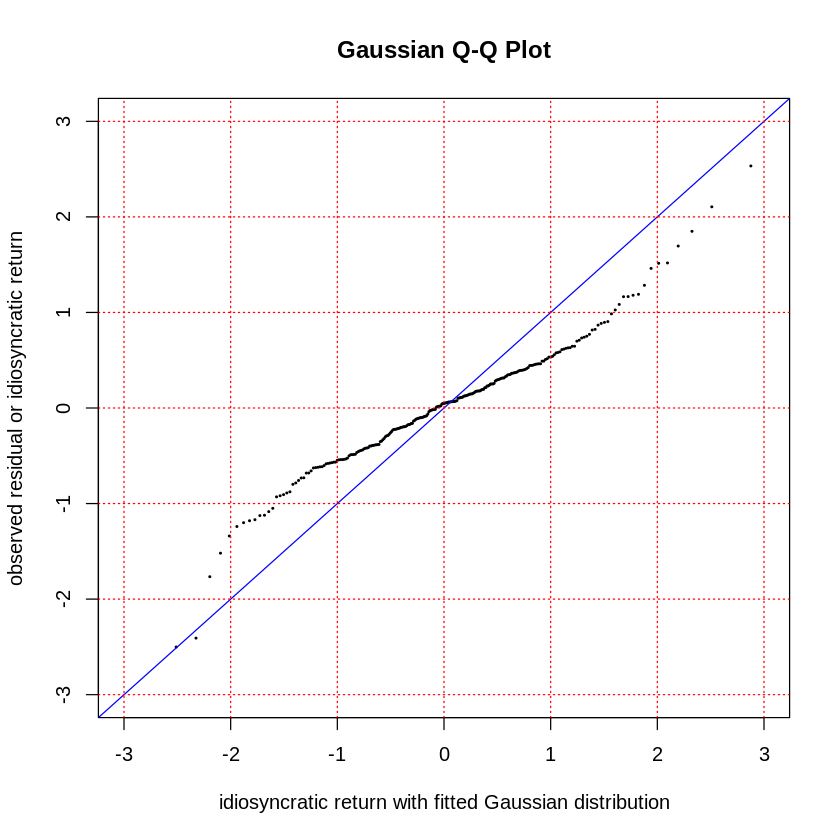

In [ ]:
qqnorm(capm_portf$residuals
       ,cex=0.3
       ,pch=20
       ,xlim=c(-3,3)
       ,ylim=c(-3,3)
       ,xlab="idiosyncratic return with fitted Gaussian distribution"
       ,ylab="observed residual or idiosyncratic return"
       ,main="Gaussian Q-Q Plot")
abline(a=0,b=1,col="blue")
grid(col="red")


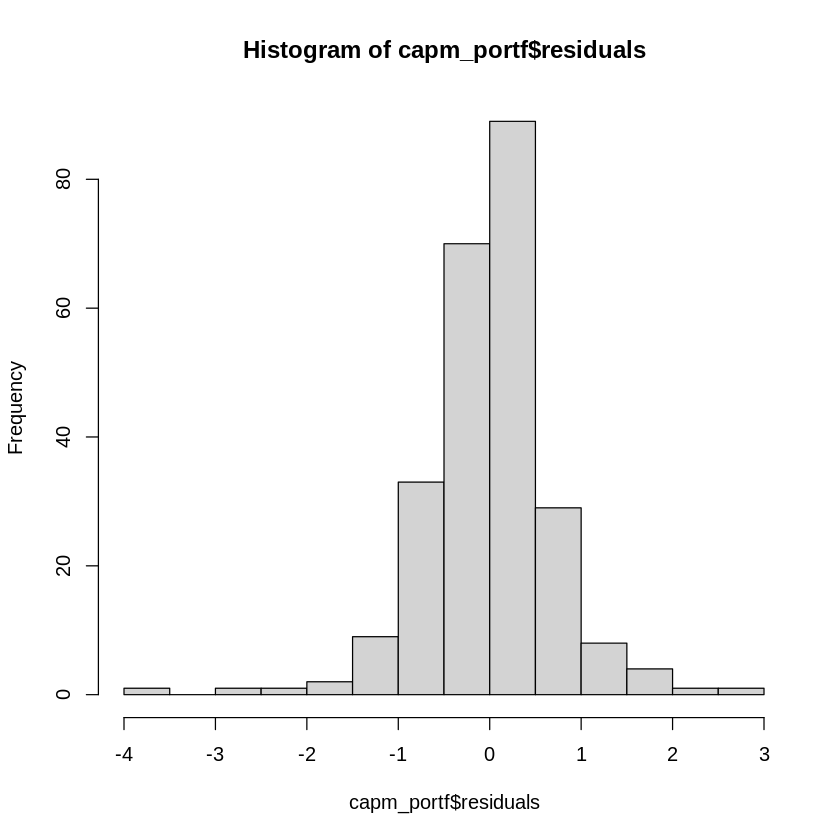

In [ ]:
hist(capm_portf$residuals)

- Assumption the $\epsilon \sim N(0,\sigma^2)$ is not correct.

- Does $\epsilon \sim Laplace(\mu,\lambda)$?


In [ ]:
## density of Laplace distribution 
dlaplace = function(x,mu,lambda){
  exp(-abs(x-mu)/lambda)/(2*lambda)
}
## The negative log-likelihood function
neg_log_likelihood = function(data,para){
  mu = para[1]
  lambda =(para[2])
  f = dlaplace(x=data
              ,mu=mu
              ,lambda=lambda)
  return(-sum(log(f)))
}


In [ ]:
## initial parameters
para.init = c(0,1)

## residual or idiosyncratic return 
## from capm_portf
e = summary(capm_portf)$residual


In [ ]:

mle = optim(para.init
           ,neg_log_likelihood
           ,data=e)
mle$par

[1] 0.04755216 0.48957078

- The following function simulate from  the fitted Laplace distribution


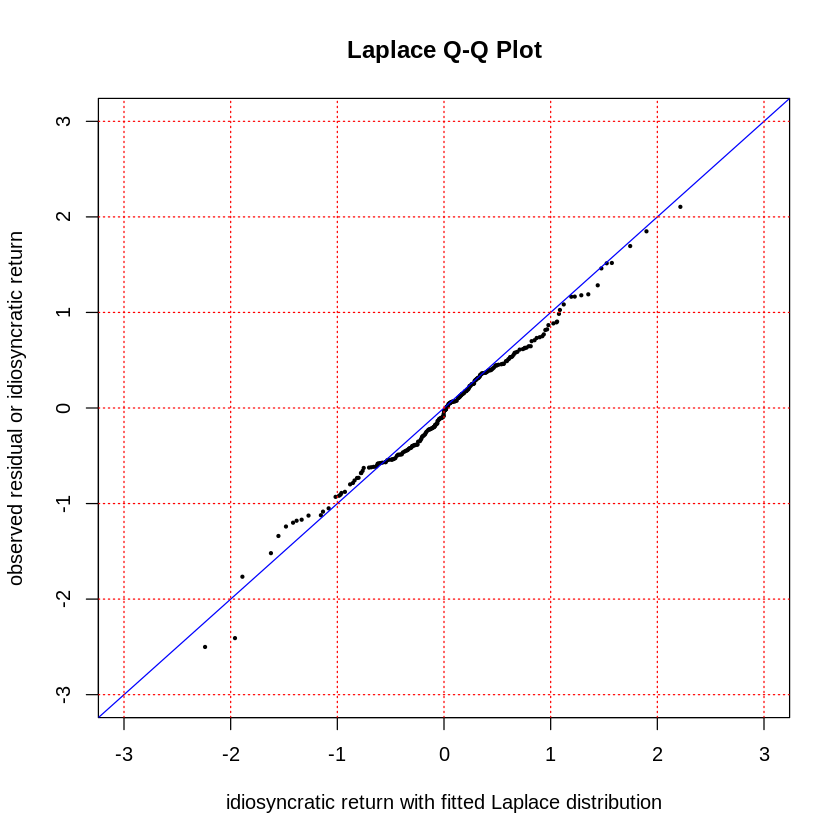

In [ ]:
rlaplace = function(n,mu,lmbda){
  # n : sample size
  # mu: location parameter
  # lambda : scale parameter
  u = runif(n,-0.5,0.5)
  sgn = rep(NA,n)
  for(i in 1:n){
    if(u[i]<0) sgn[i]<--1
    if(u[i]>0) sgn[i]<-1
    if(u[i]==0) sgn[i]<-0
  }
  r = mu-lmbda*sgn*log(1-2*abs(u))
  return(r)
}

## simulate the result
set.seed(4155)
r.sim = rlaplace(n=1000
                ,mu=mle$par[1]
                ,lmbda=mle$par[2])
qqplot(r.sim,e
       ,xlim=c(-3,3)
       ,ylim=c(-3,3)
       ,cex=0.5
       ,pch=20
       ,xlab="idiosyncratic return with fitted Laplace distribution"
       ,ylab="observed residual or idiosyncratic return"
       ,main="Laplace Q-Q Plot")
abline(a=0,b=1,col="blue")
grid(col="red")


**Bayesian CAPM where Idiosyncratic Return follows Laplace Distribution!**

- We want to model the relationship as
$$
r_t^{\text{portf}}=\alpha+\beta~r_t^{\text{S&P 500}} + \epsilon
$$
where 
  - $r_t^{\text{portf}}$ is portfolio return
  - $r_t^{\text{S&P 500}}$ is market index return
  - $\epsilon \sim Laplace(0,\lambda)$

- That is the idiosyncratic Return follows Laplace Distribution

- $$\alpha \sim Cauchy(0,1)$$
- $$\beta \sim Cauchy(0,1)$$
- $$\lambda \sim \text{Half-Cauchy}(0,1)$$

**Write log-likelihood function**

In [ ]:
log_likelihood = function(param,y,x){
  a = param[1]
  b = param[2]
  lambda = param[3]
  pred = a + b*x 
  likelihoods = -log(2*lambda)-abs(y-pred)/lambda
  sumll = sum(likelihoods)
  return(sumll)   
}


**Write log-prior function**

In [ ]:
dHalfCauchy = function(theta,log=FALSE){
  if(log==FALSE){
    return(2/(pi*(1+theta^2)))
  }else{
    return(log(2)-log(pi)-log(1+theta^2))
  }
}

log_prior = function(param,x){
  a = param[1]
  b = param[2]
  lambda = param[3]
  a_prior = dcauchy(a,0,1,log = T) 
  b_prior = dcauchy(b,0,1,log = T) 
  scale_prior = dHalfCauchy(theta=lambda,log = T)
  
  return(a_prior+b_prior+scale_prior)
}


**Write log-posterior function**

In [ ]:
log_posterior = function(param,y,x){
  like = log_likelihood(param=param,y=y,x=x)
  prior = log_prior(param=param,x=x)
  post  = like + prior
  return ( post )
}

**Bayesian CAPM Model Fitting with Metropolis-Hastings Algorithm**

- Use conjugate posterior or posterior with flat prior as **proposal function**

In [ ]:
proposalfunction = function(param,x){
  X=cbind(rep(1,length(x)),x)
  S=param[3]*solve(t(X)%*%X)
  prop = c(rmvnorm(1
                  ,mean = param[1:2]
                  ,sigma = S)
          ,rgamma(1,param[3]*5,5))
  return(prop)
}


**Run Metropolis**

In [ ]:
run_metropolis = function(startvalue, N.sim, burnin){
  iterations = N.sim + burnin
  chain = array(dim = c(iterations+1,3))
  chain[1,] = startvalue
  for (i in 1:iterations){
    proposal = proposalfunction(chain[i,],x=x)
    
    probab = exp(log_posterior(param=proposal
                               ,y=y,x=x) 
                 - log_posterior(param=chain[i,]
                                 ,y=y,x=x))
    
    if (runif(1) < probab){
      chain[i+1,] = proposal
    }else{
      chain[i+1,] = chain[i,]
    }
  }
  return(chain)
}


In [ ]:
y=ln_rt_portf
x=ln_rt_snp500
startvalue = c(0,1,0.1)
N.sim=30000
burnin=1000

set.seed(1)
chain = run_metropolis(startvalue=startvalue
                       ,N.sim=N.sim
                       ,burnin=burnin)
colnames(chain)=c("alpha","beta","lambda")
chain=chain[(burnin+1):nrow(chain),]


In [ ]:
apply(chain,2,mean)

alpha       beta     lambda 
0.04064922 1.08443496 0.49318034

In [ ]:
apply(chain,2,quantile,prob=c(0.025
                              ,0.975))


,alpha,beta,lambda
2.5%,-0.03079133,0.9992101,0.4368567
97.5%,0.10515674,1.1711139,0.5601301


In [ ]:
apply(chain,2,sd)

alpha       beta     lambda 
0.03448685 0.04442147 0.03143131

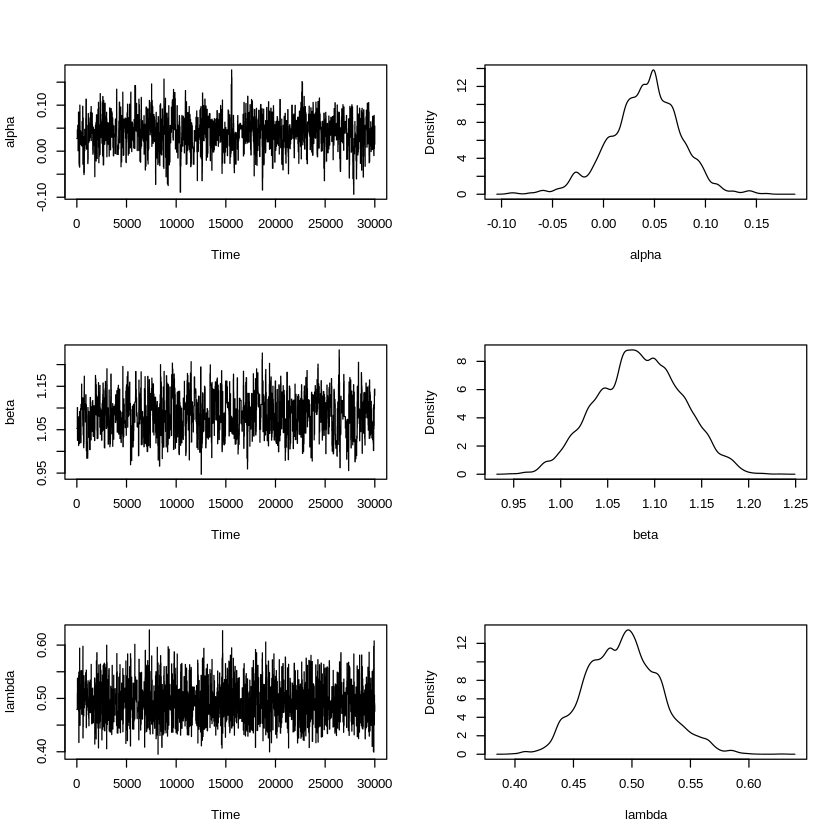

In [ ]:
par(mfrow=c(3,2))
plot(ts(chain[,"alpha"])
     ,ylab = "alpha")
plot(density(chain[,"alpha"])
     ,main = ""
     ,xlab = "alpha")
plot(ts(chain[,"beta"])
     ,ylab = "beta")
plot(density(chain[,"beta"])
     ,main = ""
     ,xlab = "beta")
plot(ts(chain[,"lambda"])
     ,ylab = "lambda")
plot(density(chain[,"lambda"])
     ,main = ""
     ,xlab = "lambda")



**What is the $\mathbb{P}(\alpha >0|y,x)$?**

In [ ]:
alpha_star = chain[,'alpha']
no.of.alpha.gt.zero = length(alpha_star[alpha_star>0])
total.no.of.alpha = length(alpha_star)

prob_a_gt_zero = (no.of.alpha.gt.zero/total.no.of.alpha)*100

round(prob_a_gt_zero,4)

[1] 88.2804